# Regresión Lineal

En esta práctica vamos a trabajar con la regresión lineal y el análisis de los resultados para este tipo de análisis. Recordad que en el caso de la regresión lineal, intentamos explicar una variable dependiente como combinación lineal de una o varias variables independientes. De forma general, intentamos estudiar la existencia de la presente relación:

$Y = a_0 + a_1 X_1 + a_2 X_2 + \dots + a_n X_n $

donde $a_0$ es un término libre o constante y los $a_i$ son los coeficientes de las correspondientes variables independientes en la combinación lineal. En Python existen múltiples herramientas para realizar análisis de regresión lineal. En esta práctica nos centraremos en las herramientas disponibles en *statsmodels*.

# Instalando los paquetes de Python adecuados e importándolos

Primero que nada, instalaremos algunos paquetes de Python que necesitaremos para la práctica. Aunque estos no vienen instalados por defecto en el entorno de Google Colab, pueden ser instalados fácilmente con *pip install nombre_paquete*. Además, importaremos algunas funciones y paquetes que sí están instalados por defecto en Google Colab como ahora *Pandas*, *Seaborn*, *Matplotlib*, o *Scipy*.

El siguiente fragmento de código realiza estas instalaciones e importaciones. Asegúrate de ejecutarlo cada vez que inicies este notebook de nuevo.

In [ ]:
!pip install researchpy
!pip install statsmodels
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
import math
from scipy import stats
import numpy as np
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# conjunto de 100 muestras, media de 10 y una desviacion tipica de 2
X = stats.norm.rvs(size=100, loc=10, scale=2)
# variable aleatoria
Y = X + stats.norm.rvs(size=100, loc=0, scale=1)

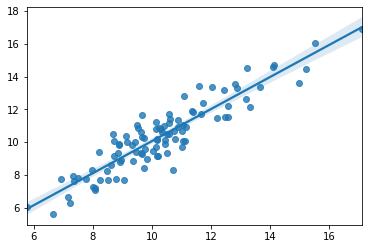

In [ ]:
# primero coges los datos y lo pintas para ver si realmente se puede hacer una regresión lineal
# regplot nos enseña la gráfica de ambos parametros x e y y tambien nos hace una regresión ajustada por minimos cuadrados
sns.regplot(x=X,y=Y)

In [ ]:
# primero creamos el analisis en si
# a la izquierda del ~ se pone la variable a predecir
analysis = ols( "Y ~ X", data=pd.DataFrame().assign(X=X, Y=Y) ) # si quiero meter varias variables seria
# "Y ~ X1 + X2 + X(X3)" X3 seria una variable categórica
fitted_model = analysis.fit()
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     519.4
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           5.95e-41
Time:                        21:02:26   Log-Likelihood:                -126.18
No. Observations:                 100   AIC:                             256.4
Df Residuals:                      98   BIC:                             261.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2946      0.449      0.656      0.5

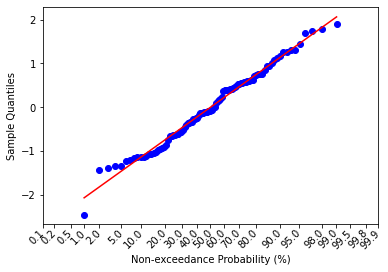

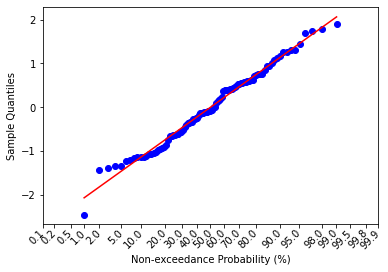

In [ ]:
# hipotesis de normalidad
# vamos a graficar los residuos y analizamos su normalidad
probPlot = sm.ProbPlot(fitted_model.resid)
probPlot.probplot(line='r')

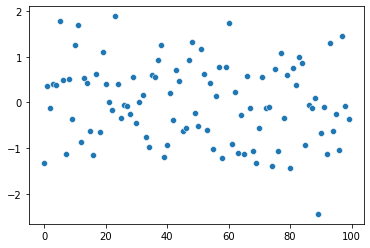

In [ ]:
# hipotesis de independencia
# analizamos la dependencia de las observaciones (las observaciones deben ser independientes como pasa abajo)
sns.scatterplot(y=fitted_model.resid, x=[i for i in range(len(fitted_model.resid))])

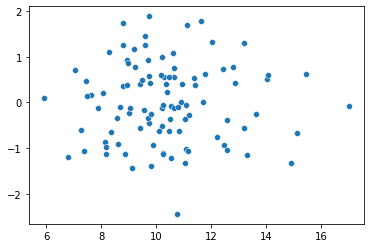

In [ ]:
# homocedasticidad
# si tuvieramos heterocedasticidad se genera una forma de embudo en la gráfica de abajo
sns.scatterplot(x=fitted_model.predict(), y=fitted_model.resid)

# Regresión univariante: Caso dependencia lineal

Como primer caso para realizar un análisis de regresión lineal, nos centraremos en un caso de regresión univariante. Es decir, estudiaremos la posible relación lineal entre una variable independiente y una variable dependiente. El siguiente fragmento de código genera 100 muestras para la relación entre una variable $X$ y un variable $Y$. La variable $X$ sigue una distribución normal con $\mu=3$ y $\sigma=2$, mientras que $Y$ sigue la siguiente expresión:

$Y = 2 X + 10 + N(0,1)$

Como vemos, hemos generado datos donde existe una relación lineal entre $X$ e $Y$. $N(0,1)$ es ruido introducido con una normal estándar.


In [ ]:
X = stats.norm.rvs(loc=3, scale=2, size=100)
Y = 2 * X + 10 + stats.norm.rvs(size=len(X))

Una vez generada nuestra muestra, podemos comenzar con el análisis de regresión entre ambas variables. En el caso de la regresión univariante simple, podemos representar gráficamente nuestra muestra y la recta de regresión estimada mediante la función *regplot*. Esta representación nos puede ayudar a observar gráficamente el ajuste de la muestra a una posible relación lineal y a descartar casos donde se aprecia de forma evidente que las variables no siguen una relación lineal.

Además de la propia recta de regresión, *regplot* también representa en un color claro el intervalo de confianza de la recta de regresión. Este intervalo de confianza significa que, a nivel poblacional, la verdadera recta de regresión se encontrará dentro de dicho intervalo $(1-\alpha)\%$ de las veces. Por lo general, estos intervalos suelen ser más estrechos en la parte central de la muestra y más anchos en los extremos. Esto es así ya que una amplia mayoría de los datos se concentran en la parte central y por tanto tenemos más certeza sobre el comportamiento de dicha recta a nivel poblacional en ese fragmento.

Como era de esperar, la muestra se puede aproximar de forma bastante ajustada mediante una recta, ya que hemos creado la muestra de una relación lineal que hemos creado.

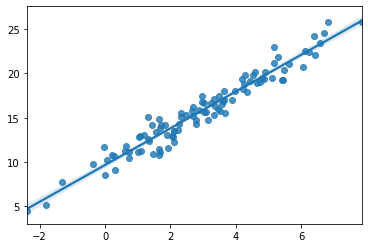

In [ ]:
sns.regplot( x=X, y=Y )

El gráfico de la muestra y la recta de regresión ajustada puede darnos una idea de la bonda del ajuste de la recta a los datos que tenemos en la muestra, pero NO nos dice nada sobre la posible relación lineal a nivel poblacional. Para ello, debemos llevar a cabo el análisis de regresión e interpretar la información que nos proporciona. 

El método *ols* disponible en *statsmodels* se emplea para llevar a cabo un análisis de regresión lineal. En el siguiente fragmento de código realizamos este análisis. Veamos paso a paso cómo realizarlo.

1. Primero que nada, en caso de que nuestros datos no se encuentren en un DataFrame, lo creamos y generamos dos columnas con el nombre que sea apropiado. En muchos casos no necesitarás crear ese DataFrame pues lo habrás cargado con el conjunto de datos que estás trabajando. El Dataframe se pasa como parámetro al método *ols* como *data*. El primer parámetro para el método *ols* es la relación lineal que queremos estudiar. A la izquierda del símbolo ~ aparecerá la variable dependiente, y a la derecha la variable independiente. Nótese como los nombres de estas variables coinciden con los nombres de las columnas del DataFrame con el que estamos trabajando.
2. El método *ols* devuelve un modelo lineal, al que hemos llamado *lm*. Para realizar el ajuste por mínimos cuadrados de dicha relación lineal, debemos llamar al método *fit*. Esto nos devolverá el modelo ajustado y el análisis de regresión realizado.
3. Finalmente, imprimimos un informe del análisis de regresión, accesible mediante el método *summary*.

In [ ]:
lm = ols('Y ~ X', data=pd.DataFrame().assign(X=X, Y=Y) )
fitted_model = lm.fit()
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     1581.
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           2.85e-62
Time:                        21:02:30   Log-Likelihood:                -145.74
No. Observations:                 100   AIC:                             295.5
Df Residuals:                      98   BIC:                             300.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.6651      0.186     51.978      0.0

Este análisis nos arroja alguna información interesante. Vayamos por partes:
* *R-squared*: Es el coeficiente de determinación. Indica el porcentaje de la variabilidad en la variable de dependiente que es explicado por la variabilidad del modelo obtenido. Nótese como este ajuste hace referencia a la muestra y NO a la población.
* *Adj. R-squared*: Es el coeficiente de determinación ajustado. Se emplea para comparar modelos de regresión con diferente número de variables.
* *Prob (F-statistic)*: Es el p-valor asociado al contraste de hipótesis del modelo de regresión. Recordad que $H_0: a_1 = a_2 = \dots = a_n = 0$ y que $H_1: \exists a_i != 0 $.
* En la tabla central podemos observar información relativa a cada uno de los componentes del modelo lineal estimado. *coef* es el coeficiente estimado ($a_i$) en base a la muestra, *std err* es su desviación típica, *t* es el valor del estadístico asociado al contraste de hipótesis que intenta determinar si el coeficiente es diferente a cero en la población, y *P>|t|* es el p-valor asociado a dicho test. Además, se incluye el intervalo de confianza del 95% para cada uno de los coeficientes.

In [ ]:
# Ejercicio: ¿Cuál es la recta de mejor ajuste obtenida a partir de la muestra?
#Y = 2.01X + 9.88

# ¿Existen evidencias para pensar que existe una relación lineal entre ambas variables a nivel POBLACIONAL? ¿Por qué?
#Si. Observando el p-valor aceptamos la hipotesis alternativa que dice que si existe una relación lineal.

Para complementar la validez del análisis anterior, sería conveniente corroborar las hipótesis del análisis de regresión lineal. Comenzamos con la normalidad de los residuos o errores del modelo. Los residuos del análisis se encuentran ya disponibles en el atributo *resid* del modelo ajustado. Podemos representarlos en un gráfico de probabilidad normal, viendo que efectivamente los residuos se comportan de forma aproximadamente normal.

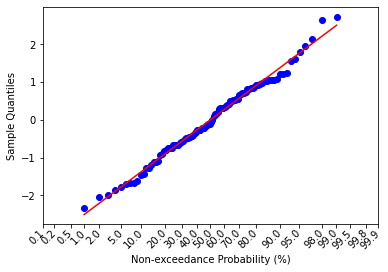

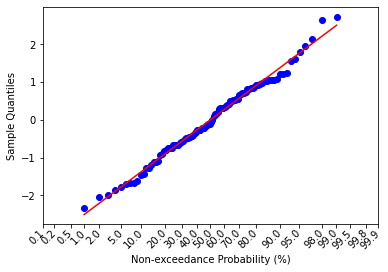

In [ ]:
plot = sm.ProbPlot(data=fitted_model.resid)
plot.probplot(line="r")

Para comprobar que existe homocedasticidad, se puede representar la predicción realizada para los datos de la muestra con respecto al residuo (error cometido en dicha predicción). Si existe homocedasticidad, se debería representar una nube aleatoria de puntos sin un patrón aparente. En caso de hocedasticidad, debería observarse cómo la nube de puntos tiende a verse como un embudo a medida que avanzamos en el eje X. Podemos dibujar este gráfico empleando los valores predichos para muestra (método *predict*) y los residuos (atributo *resid*).

Text(0, 0.5, 'Residual')

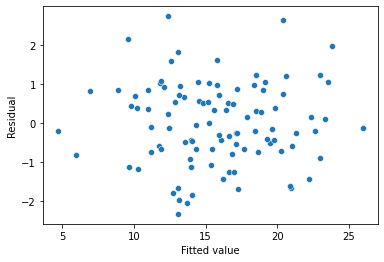

In [ ]:
f=sns.scatterplot(x=fitted_model.predict(), y=fitted_model.resid)
f.set_xlabel("Fitted value")
f.set_ylabel("Residual")

Finalmente, otra de las asunciónes del análisis de regresión lineal es la independencia de los errores. Para ver si hay dependencia en los errores podemos representar en el eje X el número de observación y en el eje Y el residuo obtenido para dicha observación. En caso de independencia no debería haber ningún patrón evidente en la gráfica representada, tal y como puede observarse en el ejemplo inferior.

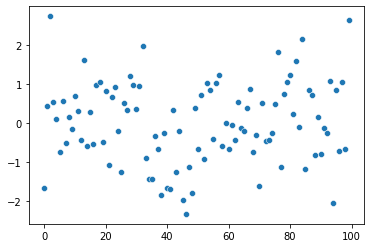

In [ ]:
f=sns.scatterplot(x=[i for i in range(len(X))], y=fitted_model.resid)

# Regresión univariante: Casos dependencia lineal parcial

Hemos visto un caso de regresión lineal univariante donde la variable dependendiente dependía en la población únicamente de nuestra variable independiente. No obstante, a veces la variable dependiente también dependerá de otras variables que no necesariamente hemos contemplado en el estudio. Supongamos que tenemos dos variables $Y$ (dependiente) y $X_1$ (independiente). La variable $X_1$ se comporta como una $N(\mu=3,\sigma=2)$. Sin embargo, aunque no hayamos recogido datos asociados, la variable $Y$ depende linealmente también de $X_2$, que es otra variable aleatoria. Más concretamente, $Y$ estará definido a nivel poblacional como:

$Y = 2X_1 + X_2 + 10 + N(0,1)$

Por tanto, $Y$ depende también de $X_2$, que en este caso la definiremos como una variable normal $N(\mu=8, \sigma=2)$.

In [ ]:
X1 = stats.norm.rvs(loc=3, scale=2, size=100)
X2 = stats.norm.rvs(loc=8, scale=2, size=100)
Y = 2 * X1 + 10 + X2 +  stats.norm.rvs(size=len(X))

Veamos qué sucede ahora al hacer el análisis de regresión lineal. Primero que nada, representa en un gráfico de dispersión la muestra recogida de $Y$ y $X_1$ y la recta de regresión ajustada. **¿Existe un ajuste razonable de la recta a la muestra? ¿Tiene sentido?** 
Si que parece existir un ajuste con sentido de la recta a la muestra.

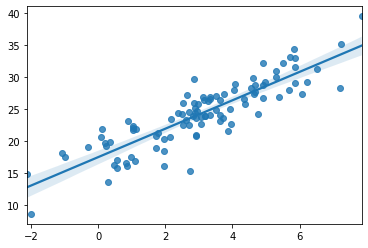

In [ ]:
#Tu código aquí
sns.regplot( x=X1, y=Y )

Ahora realiza el análisis de regresión lineal y comprueba las asunciones del análisis de regresión.

**¿En comparación al modelo anterior, el ajuste de la recta aprendida a la muestra es mejor o peor? ¿Por qué?**
Es peor. Porque para la muestra que estamos tratando, la r^2 es peor.

**¿Existen evidencias de una relación lineal entre X1 e Y a nivel poblacional? ¿Por qué?**
Según la P(F-statistic) si existe una relación lineal.

**¿Qué recta ha sido ajustada a la muestra?**
Y = 1.82X + 18.34

**¿Se cumplen de forma razonable las hipótesis del análisis de regresión?**

**¿Qué se puede decir, a nivel general, cuando un análisis de regresión no contempla alguna variable con la que existe relación lineal a nivel poblacional con respecto a otro que si la incluye?**
En el análisis que no contempla todas las variables, aunque puede que describamos bien el comportamiento de Y, cabe la posibilidad de que estemos ignorando precisión para el modelo.

In [ ]:
#Tu código aquí
lm = ols('Y ~ X1', data=pd.DataFrame().assign(X=X1, Y=Y) )
fitted_model = lm.fit()
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     307.7
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           5.42e-32
Time:                        21:02:34   Log-Likelihood:                -234.95
No. Observations:                 100   AIC:                             473.9
Df Residuals:                      98   BIC:                             479.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.5132      0.462     37.932      0.0

Ahora vamos a hacer que, a nivel poblacional, la variable X2 (omitida en el análisis) tenga más contribución sobre el valor final de $Y$ con respecto al anterior análisis. Es decir, un coeficiente mayor en valor absoluto:

$Y = 2X_1 + 3X_2 + 10 + N(0,1)$

In [ ]:
X1 = stats.norm.rvs(loc=3, scale=2, size=100)
X2 = stats.norm.rvs(loc=8, scale=2, size=100)
Y = 2 * X1 + 10 + 3*X2 +  stats.norm.rvs(size=len(X))

Realiza un análisis de regresión de nuevo

**¿Cómo ha influido esto sobre los resultados del análisis?**
El pvalor nos dice que existe una mayor linealidad que con el modelo anterior, aunque en ambos modelos obtenemos una relación lineal.
Lo que si nos dice que este segundo modelo es mejor es el coeficiente de determinación ajustado, el cual en este segundo análisis a mejorado considerablemente, lo que describe mejor Y.

In [ ]:
#Tu código aquí
lm = ols('Y ~ X1 + X2', data=pd.DataFrame().assign(X=X1+X2, Y=Y) )
fitted_model = lm.fit()
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     2557.
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           1.21e-84
Time:                        21:02:34   Log-Likelihood:                -143.63
No. Observations:                 100   AIC:                             293.3
Df Residuals:                      97   BIC:                             301.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5370      0.446     23.626      0.0

#Regresión univariante: Casos dependencia no lineal

Hemos realizado regresiones univariantes sobre variables que guardaban una relación lineal a nivel poblacional. No obstante, a veces las variables también pueden guardar relaciones no lineales. ¿cómo se vería representado esto en un análisis de regresión lineal? Una curva.

In [ ]:
X1 = stats.norm.rvs(loc=0, scale=4, size=100)
X1sq = X1*X1
Y =  X1sq + stats.norm.rvs(size=len(X1), loc=0, scale=10)

Hemos creado una muestra de dos variables aleatorias $Y$ y $X_1$. En este caso, $X_1$ es una normal $N(\mu=0,\sigma=4)$ y $Y$ está definido a nivel poblacional como:

$Y = X_1^2 + N(0,10)$

Como apreciamos, existe una relación cuadrática entre ambas variables aleatorias. Hemos recogido una muestra de tamaño 100. Veamos qué se observa en el análisis de regresión lineal.

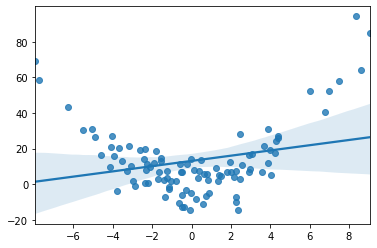

In [ ]:
sns.regplot(x=X1, y=Y)

El gráfico de dispersión muestra una clara relación no lineal en la muestra. Además, como es evidente, la recta ajustada no tendrá un buen ajuste en la muestra pues no existe una relación lineal entre ambas variables aleatorias. Esto mismo también se refleja en el análisis de regresión lineal.

In [ ]:
lm = ols('Y ~ X', data=pd.DataFrame().assign(X=X1, Y=Y) )
fitted_model = lm.fit()
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     6.667
Date:                Tue, 22 Dec 2020   Prob (F-statistic):             0.0113
Time:                        21:02:44   Log-Likelihood:                -437.75
No. Observations:                 100   AIC:                             879.5
Df Residuals:                      98   BIC:                             884.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0615      1.948      6.704      0.0

Aunque puede que el modelo llegue a detectar una relación entre ambas variable (dependerá de la muestra generada), el ajuste es pobre. A nivel de la muestra, el porcentaje de variabilidad explicado por el modelo es muy bajo. Esto indica que la complejidad del modelo debería incrementarse bien incluyendo nuevas variables aleatorias o bien cambiando el tipo de modelo subyacente.

Si analizamos los residuos también vemos que existen evidencias de un efecto cuadrático no contemplado en el modelo. El valor absoluto de los residuos tiende a ser más grande en valor absoluto para valores pequeños y grandes del valor predicho que en regiones centrales. Esto también se aprecia en las colas del gráfico de probabilidad normal de los residuos.

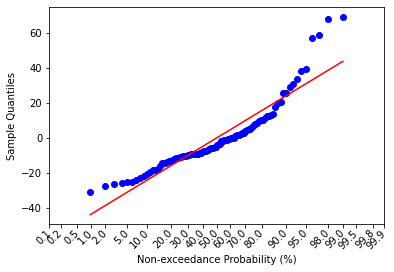

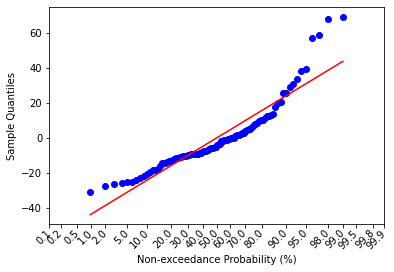

In [ ]:
plot = sm.ProbPlot(data=fitted_model.resid)
plot.probplot(line="r")

Text(0, 0.5, 'Residual')

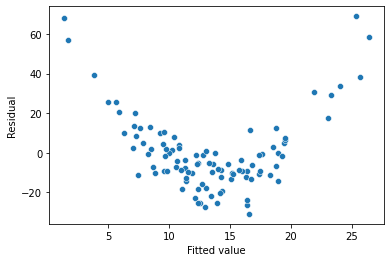

In [ ]:
f=sns.scatterplot(x=fitted_model.predict(), y=fitted_model.resid)
f.set_xlabel("Fitted value")
f.set_ylabel("Residual")

Fíjate cómo el ajuste y bondad del modelo mejora precisamente al introducir ese término cuadrático. Podemos introducir varias variables independientes en el análisis separadas por el símbolo de *+*. *np.power* indica que la columna del Dataframe debe ser potenciada al exponente indicado.

**¿Qué ha sucedido con el coeficiente de determinación en la muestra con respecto al modelo anterior? ¿qué nos está indicando?**
El coeficiente de determinación ha aumentado de un 0.059 a un 0.784. Lo que esto indica es que el nuevo modelo si que describe bien el comportamiento de Y.

**¿Existe algún término en el modelo que no sea estadísticamente significativo?**
Observando los p-value, solo el Intercept es el que tiene un P>|t| no significativo.

In [ ]:
lm = ols('Y ~ np.power(X,2) + X', data=pd.DataFrame().assign(X=X1, Y=Y) )
fitted_model = lm.fit()
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     8.411
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           0.000428
Time:                        21:08:59   Log-Likelihood:                -320.50
No. Observations:                 100   AIC:                             647.0
Df Residuals:                      97   BIC:                             654.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         43.9434      1.685     26.

# Regresión múltiple: Caso dependencia lineal

Vamos a retomar ahora uno de los casos de regresión anterior, en el que la variable dependiente $Y$ estaba relacionada linealmente con dos variables aleatorias $X_1$ y $X_2$.

$Y = 2X_1 + 3 X_2 + N(0,1)$

In [ ]:
X1 = stats.norm.rvs(loc=3, scale=2, size=100)
X2 = stats.norm.rvs(loc=8, scale=2, size=100)
Y = 2 * X1 + 10 + 3*X2 + 10 +  stats.norm.rvs(size=len(X))

Si recordamos, el modelo resultaba significativo a nivel poblacional, pero la variabilidad explicada era relativamente baja ya que no estábamos incluyendo una de las dos variables de las que dependía $Y$ a nivel poblacional.

In [ ]:
lm = ols('Y ~ X1', data=pd.DataFrame().assign(X1=X1, X2=X2, Y=Y) )
fitted_model = lm.fit()
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.30
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           1.41e-08
Time:                        21:11:40   Log-Likelihood:                -329.43
No. Observations:                 100   AIC:                             662.9
Df Residuals:                      98   BIC:                             668.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.6525      1.184     36.025      0.0

Veamos ahora como la variabilidad explicada por el modelo en la muestra aumenta al introducir la segunda variable en el análisis de regresión.

**¿Qué nos indica el coeficiente de determinación ahora? ¿son todos los términos del ajuste significativos a nivel poblacional?**
El coeficiente de determinación nos indica que existe un alto grado de predicción en este nuevo modelo.
Si, todos son significativos.

In [ ]:
# Tu código aquí
lm = ols('Y ~ X1 + X2', data=pd.DataFrame().assign(X1=X1, X2=X2, Y=Y) )
fitted_model = lm.fit()
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     2631.
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           3.15e-85
Time:                        21:11:40   Log-Likelihood:                -145.33
No. Observations:                 100   AIC:                             296.7
Df Residuals:                      97   BIC:                             304.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.0469      0.414     48.379      0.0

Vamos a ver qué ocurre con el coeficiente de determinación cuando introducimos más predictores en el modelo. Crearemos primero una serie de variables aleatorias NO relacionadas con la variable independiente.

In [ ]:
X3= stats.expon.rvs(loc=0, scale=1/3, size=100)
X4 = stats.norm.rvs(loc=0, scale=2, size=100)
X5 = stats.binom.rvs(n=20, p=0.5, size=100)
X6 = -stats.lognorm.rvs(s=3, size=100)

Introducimos dichas variables aleatorias en el análisis de regresión.

In [ ]:
lm = ols('Y ~ X1 + X2 + X3 + X4 + X5 + X6', data=pd.DataFrame().assign(X1=X1, X2=X2, X3=X3, X4=X4, X5=X5, X6=X6, Y=Y) )
fitted_model = lm.fit()
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     887.8
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           8.93e-80
Time:                        21:11:40   Log-Likelihood:                -142.66
No. Observations:                 100   AIC:                             299.3
Df Residuals:                      93   BIC:                             317.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.9968      0.692     30.355      0.0

Seguramente habrás podido observar que el coeficiente de determinación se ha incrementado aunque sea ligeramente. El coeficiente de determinación únicamente puede incrementarse al introducir nuevas variables como predictoras, aunque éstas no aporten nada a nivel explicativo en referencia a la variable dependiente. Es por ello, que cuando contemplamos más de una variable predictora comparamos los modelos en base al coeficiente de determinación ajustado. Éste únicamente se incrementa cuando el modelo mejora más de lo que sería esperado por mero azar, y empeora cuando el modelo empeora más de lo que sería esperado por mero azar. Como verás, el coeficiente de determinación ajustado NO habrá mejora ya que las variables introducidas no ayudan a explicar la variable dependiente. Por tanto, optaremos por el modelo que únicamente contemplaba $X_1$ y $X_2$ como modelo más explicativo. A igualdad de $R^2$ ajustados preferimos los modelos con menos variables explicativas, ya que tienden a evitar más los problemas de *overfitting* (hablaremos de ello en teoría).

# Lidiando con la heterocedasticidad

En la práctica, es bastante frecuente que nos encontremos con análisis de regresión donde la heterocedasticidad está presente. Esto significa que el error no es constante y cambia con el valor de las variables predictoras. Esta situación es frecuente, ya que en la naturaleza es habitual observar mayor variabilidad para valores extremos. Generemos un conjunto de datos con heterocedasticidad:

$Y = X + 4 + N(\mu=0, \sigma=x)$

Como vemos, en el ruido introducido el error depende de la observación en concreto, por lo que a mayor sea la observación mayor error se tenderá a introducir.

In [ ]:
import time
np.random.seed(3424)
X = stats.norm.rvs(size=100, loc=10, scale=5)
errors = [ stats.norm.rvs(size=1, loc=0, scale=max(0.01,e))[0] for e in X ]
Y = 2*X + errors 

Si dibujamos el gráfico de dispersión podemos obsrvar como las observaciones tienden a estar más lejos del valor medio o recta de regresión estimada a medida que la observación de la variable independiente es más grande. Esto es un signo de heterocedasticidad.

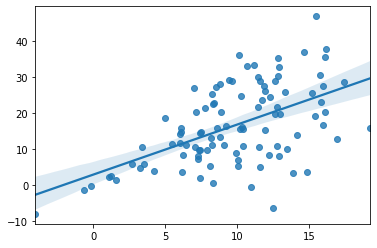

In [ ]:
sns.regplot(x=X, y=Y)

Podemos solicitar a *statmodels* que nos devuelva el análisis de regresión pese a que haya heterocedasticidad. No obstante, no podemos fiarnos del todo de algunas de las inferencias realizadas.

In [ ]:
lm = ols('Y ~ X', data=pd.DataFrame().assign(X=X, Y=Y) )
fitted_model = lm.fit()
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     41.88
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           3.85e-09
Time:                        21:21:30   Log-Likelihood:                -363.79
No. Observations:                 100   AIC:                             731.6
Df Residuals:                      98   BIC:                             736.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8818      2.297      1.254      0.2

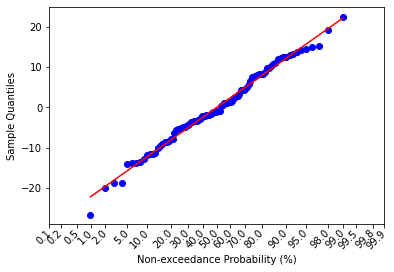

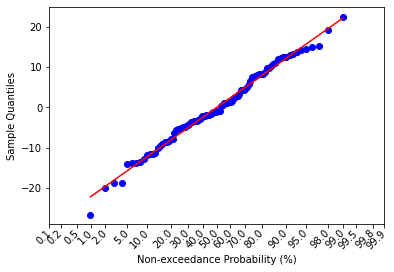

In [ ]:
plot = sm.ProbPlot(data=fitted_model.resid)
plot.probplot(line="r")

Al dibujar el gráfico de los residuos con respecto al valor predicho, podemos precisamente ver la heterocedasticidad presente. Se puede observar una forma de tipo "embudo" creciente. Esto nos confirma que tenemos heterocedasticidad en nuestros datos.

Text(0, 0.5, 'Residual')

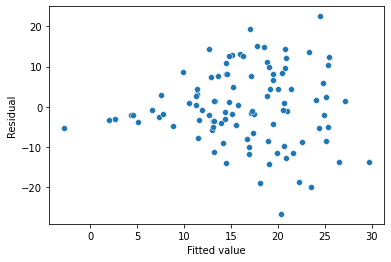

In [ ]:
f=sns.scatterplot(x=fitted_model.predict(), y=fitted_model.resid)
f.set_xlabel("Fitted value")
f.set_ylabel("Residual")

La heterocedasticidad no afecta a la estimación de la recta de regresión, aunque sí afecta a las inferencias realizadas en el análisis de regresión (e.g., intervalos de confianza, p-valores, etc.). Por tanto, sería conveniente no usar los coeficientes del análisis de regresión estándar en presencia de heterocedasticidad. Una posible solución al problema de la heterocedasticidad es emplear un cálculo especial de los errores estándar que sea robusto a la heterocedasticidad. Estas correcciones son similares a las aplicadas en ANOVA para datos con heterocedasticidad. Por ejemplo, podemos hacer una estimación robusta de la covarianza con el método *HC3*. Nótese como la recta de regresión no ha cambiado, pero sí muchas de las inferencias realizadas (i.e., intervalos de confianza de los coeficientes, p-valores, estimación de los errores, etc.).

In [ ]:
lm = ols('Y ~ X', data=pd.DataFrame().assign(X=X, Y=Y) )
fitted_model = lm.fit(cov_type="HC3")
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     51.80
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           1.25e-10
Time:                        21:23:59   Log-Likelihood:                -363.79
No. Observations:                 100   AIC:                             731.6
Df Residuals:                      98   BIC:                             736.8
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8818      1.609      1.790      0.0

En presencia de heterocedasticidad, estos métodos de estimación robusta de las covarianzas son más fiables. No obstante, no son la única alternativa. Aunque no lo cubriremos en esta asignatura, existen métodos de *regresión robusta* que se emplean en situaciones donde las asunciones de la regresión por mínimos cuadrados no se cumplen.

#Tarea: Regresión sobre un conjunto de datos reales

Para esta pequeña tarea trabajaremos con un conjunto de datos del mercado inmobiliario en un condado en el estado de Washington (USA). Este conjunto de datos guarda informaciónd e inmuebles y sus correspondientes precios de venta.

Primero, cargaremos el conjunto de datos.

In [ ]:
string_csv = requests.get("https://gitlab.com/drvicsana/ciencia-datos/-/raw/master/datasets/realestate/house_data.csv").content
string_stream = io.StringIO(string_csv.decode("utf-8"))
house_df = pd.read_csv(string_stream)
house_df = house_df.assign( year= house_df.date.apply(lambda d: d[0:4]) )
house_df = house_df[ house_df.year == "2015" ]
house_df = house_df.assign( age_renovation = house_df.apply(lambda r: 2015 - r.yr_renovated if r.yr_renovated else 2015-int(r.yr_built), axis=1 ) )
house_df = house_df.assign( age = house_df.yr_built.apply(lambda y: 2015-int(y)) )
house_df = house_df.sample(n=1000)

Explora el conjunto de datos para ver las variables aleatorias de las que disponemos, así como su contenido. Emplea el comando *head* , *describe*, y el atributo *shape*.

In [ ]:
# Tu código aquí
house_df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,age_renovation,age
16848,2891400380,20150414T000000,449950.0,3,1.75,2070,96703,1.0,0,3,4,7,2070,0,1999,0,98092,47.2853,-122.008,1820,117612,2015,16,16
18815,9274200735,20150507T000000,567500.0,4,1.75,2190,5060,1.0,0,0,3,7,1190,1000,1950,0,98116,47.5846,-122.387,1510,4600,2015,65,65
10305,9264900350,20150424T000000,285000.0,3,2.25,1840,9040,1.0,0,0,3,8,1370,470,1979,0,98023,47.3144,-122.339,1870,8992,2015,36,36
9797,1563102685,20150422T000000,875000.0,3,2.50,2520,3750,2.0,0,1,4,9,2520,0,1995,0,98116,47.5671,-122.404,2250,6200,2015,20,20
14511,8122101115,20150421T000000,435000.0,4,2.50,2180,6500,2.0,0,0,3,7,1410,770,1945,0,98126,47.5365,-122.370,920,6500,2015,70,70


In [ ]:
house_df.shape

(1000, 24)

In [ ]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age_renovation,age
count,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.649235e+09,5.231124e+05,3.339000,2.081500,2006.451000,14147.005000,1.483000,0.009000,0.206000,3.369000,7.557000,1736.864000,269.58700,1972.129000,53.84000,98075.212000,47.547571,-122.219755,1925.308000,12217.651000,41.553000,42.871000
std,2.874067e+09,3.316092e+05,0.873408,0.769708,888.225315,39005.244625,0.552735,0.094488,0.715595,0.607625,1.161077,811.208519,416.96206,28.777396,323.38158,52.496161,0.139539,0.131214,638.911864,33482.025191,28.548384,28.777396
min,3.600057e+06,1.050000e+05,0.000000,0.750000,410.000000,649.000000,1.000000,0.000000,0.000000,1.000000,4.000000,410.000000,0.00000,1900.000000,0.00000,98001.000000,47.177600,-122.463000,750.000000,928.000000,0.000000,0.000000
25%,2.312953e+09,3.150000e+05,3.000000,1.500000,1370.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1160.000000,0.00000,1954.000000,0.00000,98031.000000,47.449850,-122.336250,1460.000000,5100.000000,17.000000,19.000000
50%,3.876100e+09,4.415000e+05,3.000000,2.250000,1840.000000,7500.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.00000,1975.000000,0.00000,98059.000000,47.556600,-122.225500,1790.000000,7534.000000,38.000000,40.000000
75%,7.399225e+09,6.200000e+05,4.000000,2.500000,2420.000000,10490.250000,2.000000,0.000000,0.000000,4.000000,8.000000,2120.000000,470.00000,1996.000000,0.00000,98117.000000,47.669050,-122.137000,2280.000000,10078.500000,60.000000,61.000000
max,9.835801e+09,3.567000e+06,7.000000,6.000000,7730.000000,871200.000000,3.000000,1.000000,4.000000,5.000000,12.000000,6660.000000,2220.00000,2015.000000,2015.00000,98199.000000,47.776300,-121.709000,5220.000000,858132.000000,115.000000,115.000000


Podemos observar la matriz de correlación muestral para todas las variables disponibles en el conjunto de datos con el método *corr* definido dentro del Dataframe. Esto nos debería dar una idea de qué variables están posiblemente relacionadas linealmente entre sí.

In [ ]:
house_df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age_renovation,age
id,1.000000,-0.022735,-0.059546,-0.022747,-0.041275,-0.157927,0.044259,-0.043793,0.020735,-0.021767,0.003983,-0.034925,-0.019979,0.034707,-0.009777,0.011593,-0.001964,-0.008502,-0.021933,-0.133794,-0.032562,-0.034707
price,-0.022735,1.000000,0.314140,0.510265,0.669955,0.138029,0.249935,0.284138,0.366817,0.089249,0.663136,0.580679,0.297434,0.037122,0.074815,0.006861,0.350601,0.030093,0.598559,0.151801,-0.068944,-0.037122
bedrooms,-0.059546,0.314140,1.000000,0.523560,0.582605,0.117240,0.152946,-0.000619,0.096361,0.050755,0.361449,0.480129,0.306981,0.221881,-0.021476,-0.149829,-0.033126,0.163334,0.394976,0.087399,-0.220618,-0.221881
bathrooms,-0.022747,0.510265,0.523560,1.000000,0.769348,0.188680,0.503825,0.110336,0.217104,-0.085769,0.669363,0.701944,0.273242,0.535474,0.001258,-0.178987,0.012211,0.220847,0.545299,0.186097,-0.548053,-0.535474
sqft_living,-0.041275,0.669955,0.582605,0.769348,1.000000,0.252724,0.324290,0.144890,0.287078,-0.006960,0.761341,0.883472,0.411418,0.344221,0.005806,-0.176738,0.036302,0.261303,0.743928,0.253537,-0.352068,-0.344221
sqft_lot,-0.157927,0.138029,0.117240,0.188680,0.252724,1.000000,-0.011305,0.024918,0.102319,0.044928,0.126691,0.265375,0.022068,0.051675,0.005387,-0.112599,-0.053896,0.246042,0.095579,0.857034,-0.049797,-0.051675
floors,0.044259,0.249935,0.152946,0.503825,0.324290,-0.011305,1.000000,0.041265,0.063274,-0.243583,0.428884,0.480794,-0.244583,0.512209,-0.039152,-0.021316,0.056391,0.083276,0.221426,0.006837,-0.514758,-0.512209
waterfront,-0.043793,0.284138,-0.000619,0.110336,0.144890,0.024918,0.041265,1.000000,0.475903,0.081579,0.127621,0.108736,0.097100,-0.053439,0.049285,0.041389,-0.047659,-0.061862,0.132024,0.059680,0.037488,0.053439
view,0.020735,0.366817,0.096361,0.217104,0.287078,0.102319,0.063274,0.475903,1.000000,0.055219,0.261747,0.213834,0.195523,-0.031283,0.055589,0.121463,-0.024409,-0.096218,0.244593,0.129639,0.002699,0.031283
condition,-0.021767,0.089249,0.050755,-0.085769,-0.006960,0.044928,-0.243583,0.081579,0.055219,1.000000,-0.101495,-0.087247,0.154915,-0.320556,-0.060749,-0.047173,-0.074990,-0.029535,-0.012902,0.032820,0.339478,0.320556


También podemos representar esta información gráficamente con un mapa de calor, apoyándonos en *Seaborn*. Ambos son métodos de visualización complementarios.

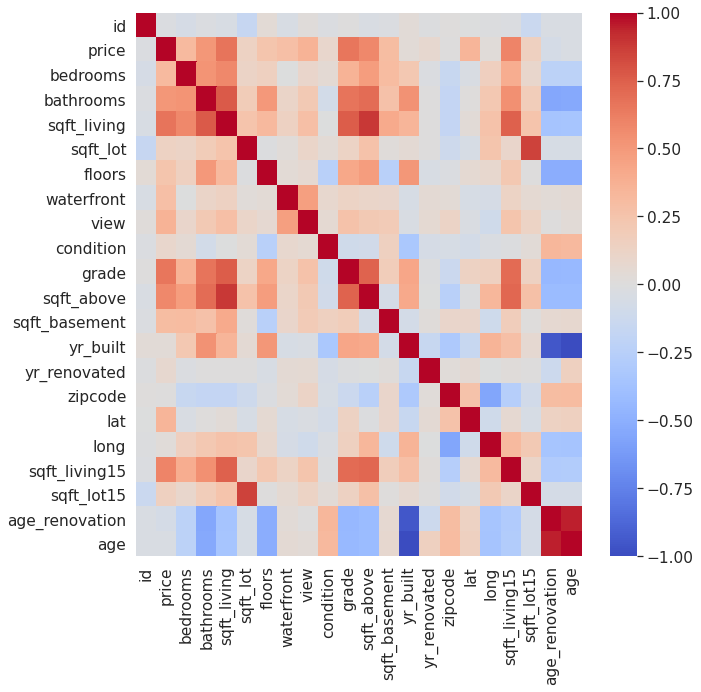

In [ ]:
f=plt.figure(figsize=(10,10))
sns.set(font_scale=1.4)
sns.heatmap(house_df.corr(), cmap="coolwarm")

Para centrarnos en la correlación de todo el conjunto de variables con una variable concreta del Dataframe, podemos emplear *corrwith* y proporcionar como parámetro la columna con la cual queremos construir los coeficientes de correlación.

In [ ]:
house_df.corrwith(house_df.price)

id               -0.022735
price             1.000000
bedrooms          0.314140
bathrooms         0.510265
sqft_living       0.669955
sqft_lot          0.138029
floors            0.249935
waterfront        0.284138
view              0.366817
condition         0.089249
grade             0.663136
sqft_above        0.580679
sqft_basement     0.297434
yr_built          0.037122
yr_renovated      0.074815
zipcode           0.006861
lat               0.350601
long              0.030093
sqft_living15     0.598559
sqft_lot15        0.151801
age_renovation   -0.068944
age              -0.037122
dtype: float64

En base a lo que sabes hasta ahora, construye un análisis de regresión lineal simple para intentar encontrar la relación entre el precio (dependiente) y los pies cuadrados del comedor (sqft_living, independiente).

**¿Existen evidencias a nivel poblacional de una relación lineal entre ambas variables? ¿Por qué?**
Según el resultado obtenido en la Prob(F-Statistic), podemos deducir que la probabilidad de que se cumpla la hipótesis nula es muy baja, por lo que si existe relación lineal.

**¿Qué porcentaje de la variabilidad en el precio es explicado en la muestra por los pies cuadrados del comedor?**
44.8%

**¿Se cumplen las hipótesis del análisis de regresión? ¿Considerarías las conclusiones válidas?**
Observando los residuos podemos ver que por la forma que tienen parece existir una cierta heterocedasticidad, ademas el coeficiente de determinación no es muy fiable, por lo que considero que las conclusiones no son válidas.


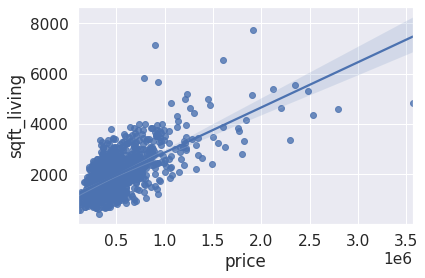

In [ ]:
#Tu código aquí
X = house_df.price
Y = house_df.sqft_living

sns.regplot( x=X, y=Y )

In [ ]:
lm = ols('Y ~ X', data=pd.DataFrame().assign(X=X, Y=Y) )
fitted_model = lm.fit()
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     812.7
Date:                Tue, 22 Dec 2020   Prob (F-statistic):          2.98e-131
Time:                        21:49:20   Log-Likelihood:                -7909.8
No. Observations:                1000   AIC:                         1.582e+04
Df Residuals:                     998   BIC:                         1.583e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1067.7289     38.981     27.391      0.0

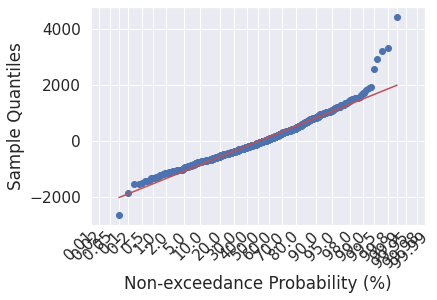

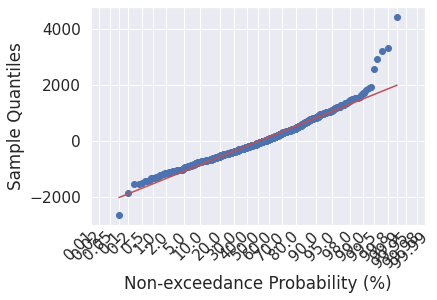

In [ ]:
plot = sm.ProbPlot(data=fitted_model.resid)
plot.probplot(line="r")

Text(0, 0.5, 'Residual')

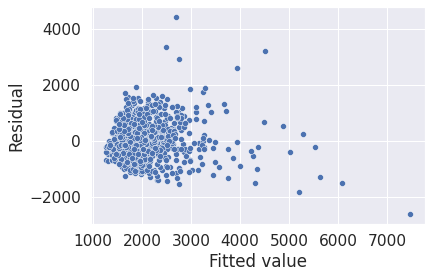

In [ ]:
f=sns.scatterplot(x=fitted_model.predict(), y=fitted_model.resid)
f.set_xlabel("Fitted value")
f.set_ylabel("Residual")